<a href="https://colab.research.google.com/github/valedonnet/Linear-Regression-Project-Tutorial/blob/main/Linear_Regression_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Step 1: Loading the dataset##

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Step 2: Perform a full EDA##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#There are a total of 1338 rows and 7 columns in the dataset, whith non null values.The target or class to predict is "Charges".
#The data has 3 categorical characteristics and 4 numerical type

In [ ]:
df_copy=df.copy()

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


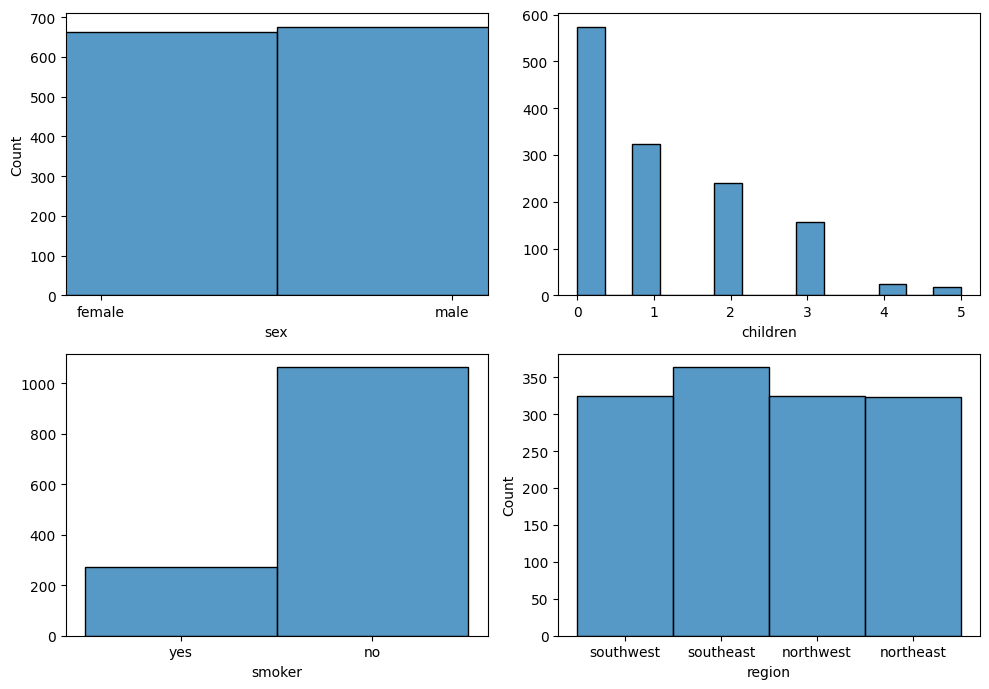

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "sex").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = df, x = "children").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "region")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

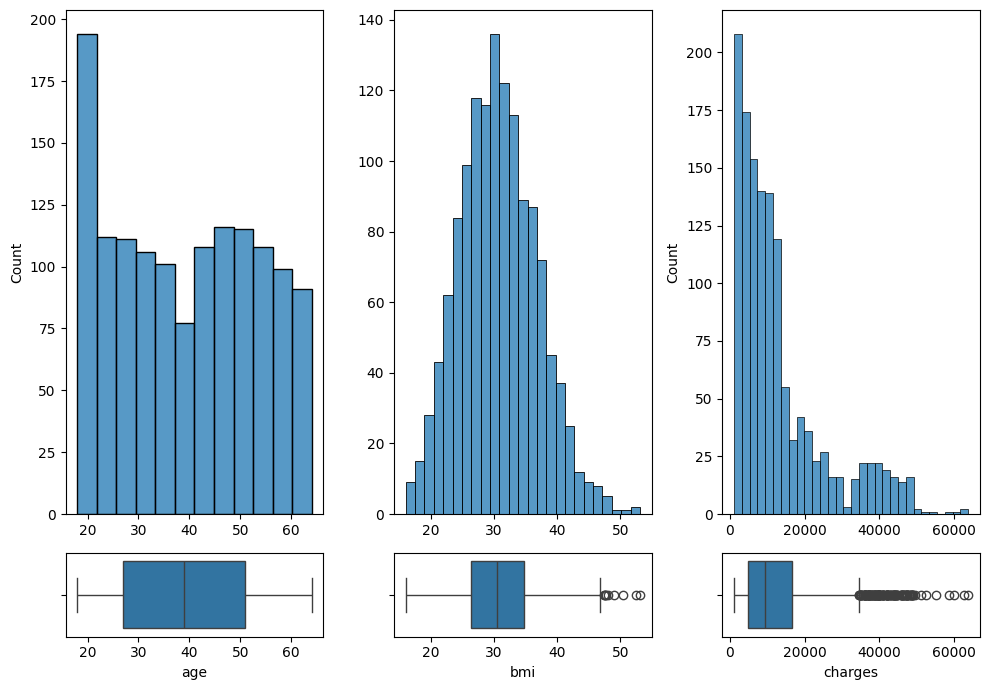

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[0, 2], data = df, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "charges")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

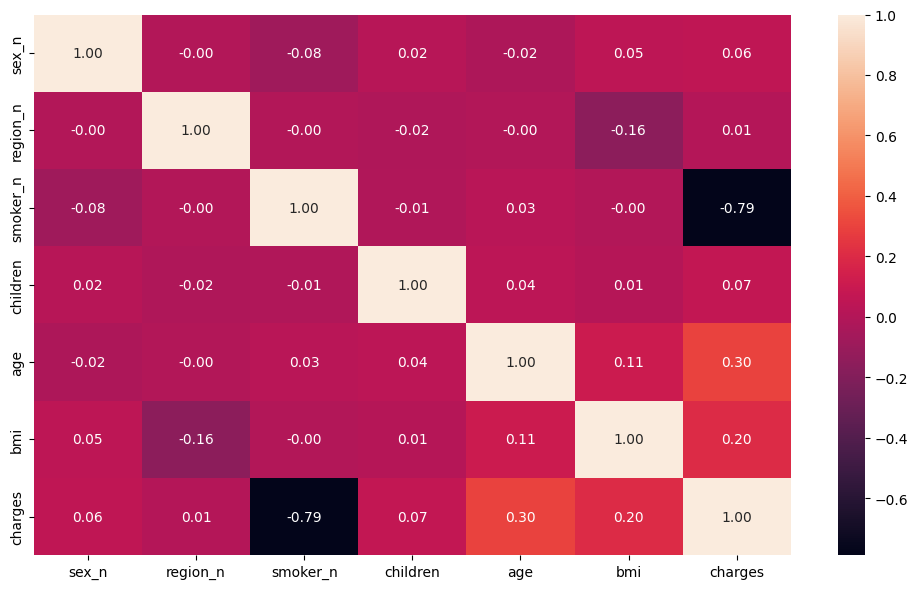

In [ ]:
#Correlation analisis
df["sex_n"] = pd.factorize(df["sex"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["sex_n", "region_n", "smoker_n", "children", "age", "bmi","charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
df.describe()

,age,bmi,children,charges,sex_n,region_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,1.484305,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,1.104885,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,2.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,3.000000,1.000000


In [ ]:
df.drop(["sex", "region", "smoker"], axis = 1, inplace = True)

In [ ]:
df

,age,bmi,children,charges,sex_n,region_n,smoker_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,2,1
4,32,28.880,0,3866.85520,1,2,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,2,1
1334,18,31.920,0,2205.98080,0,3,1
1335,18,36.850,0,1629.83350,0,1,1
1336,21,25.800,0,2007.94500,0,0,1


##Step 3: Build a linear regression model##

In [ ]:
y=df["charges"]
X=df.drop("charges", axis=1)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Ajustar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", model.coef_)
print("Intersección:", model.intercept_)
print("Error Cuadrático Medio (MSE):", mse)
print("R-cuadrado (R2):", r2)

Coeficientes: [ 2.57056264e+02  3.35781491e+02  4.25091456e+02 -1.87914567e+01
  2.71284266e+02 -2.36478181e+04]
Intersección: 10887.358730791073
Error Cuadrático Medio (MSE): 33635210.431178406
R-cuadrado (R2): 0.7833463107364539


##Step 4: Optimize the previous model##

In [ ]:
#def normalize(array):
#  return (array - array.mean())/array.std()

#num=['age', 'bmi']
#for numerical in num:
#  df[numerical] = normalize(df[numerical].to_numpy())